# Task-1 : BEGINNER LEVEL TASK

## Task: Iris Flowers Classification ML Project 

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Datasetlink Watch Tutorial from here https://youtu.be/CBCfOTePVPo  : http://archive.ics.uci.edu/ml/datasets/Iris 

### Importing Libraries

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from pandas import plotting
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importing Iris dataset using sklearn
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# to explore first five and last five rows of Iris Dataset
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
# we only take the first two features.
X = iris.data[:, :2]  
y = iris.target

In [6]:
print(X.shape) 

(150, 2)


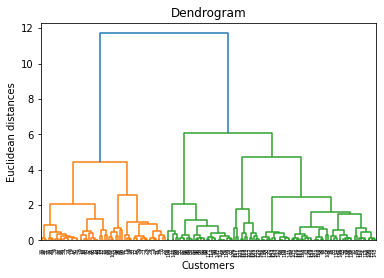

In [7]:
# To construct Dendogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Visualizing Data

In [8]:
# To divide our data into three clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

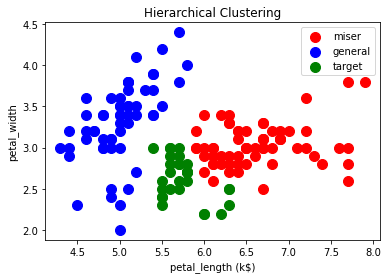

In [9]:
# To plot the data points to see three clusters

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'target')

plt.title('Hierarchical Clustering')
plt.xlabel('petal_length (k$)')
plt.ylabel('petal_width')
plt.legend()
plt.show()

### Visualize the whole dataset

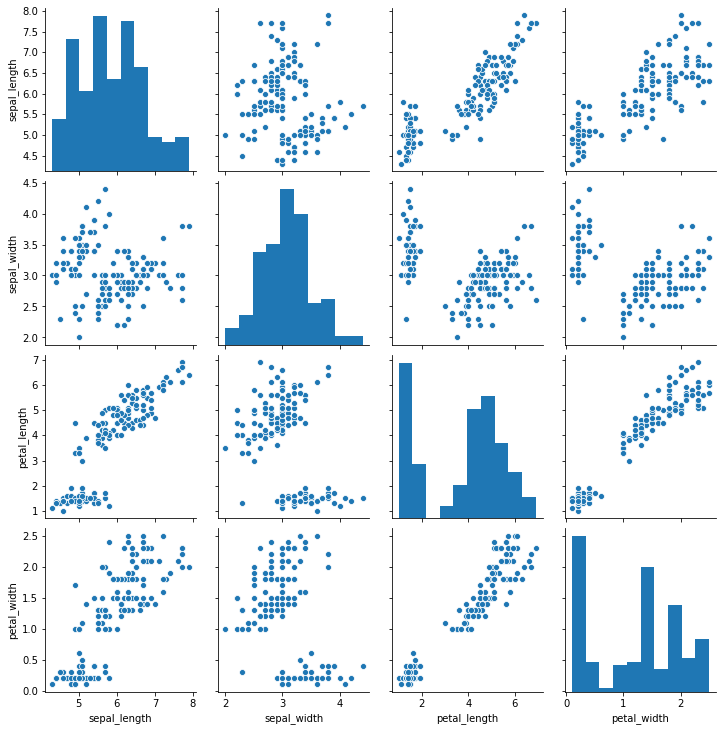

In [10]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

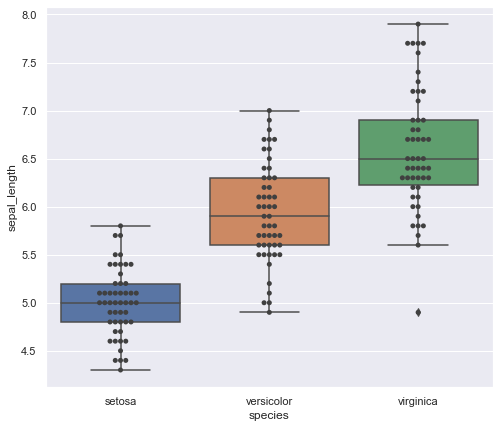

In [11]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='species', y='sepal_length', data=iris)
sns.swarmplot(x='species', y='sepal_length', data=iris, color = ".25")

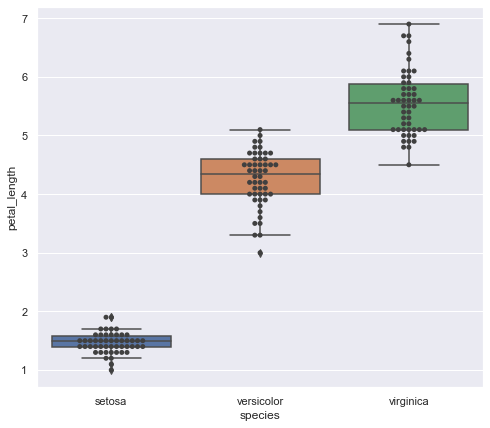

In [12]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='species', y='petal_length', data=iris)
sns.swarmplot(x='species', y='petal_length', data=iris, color = ".25")

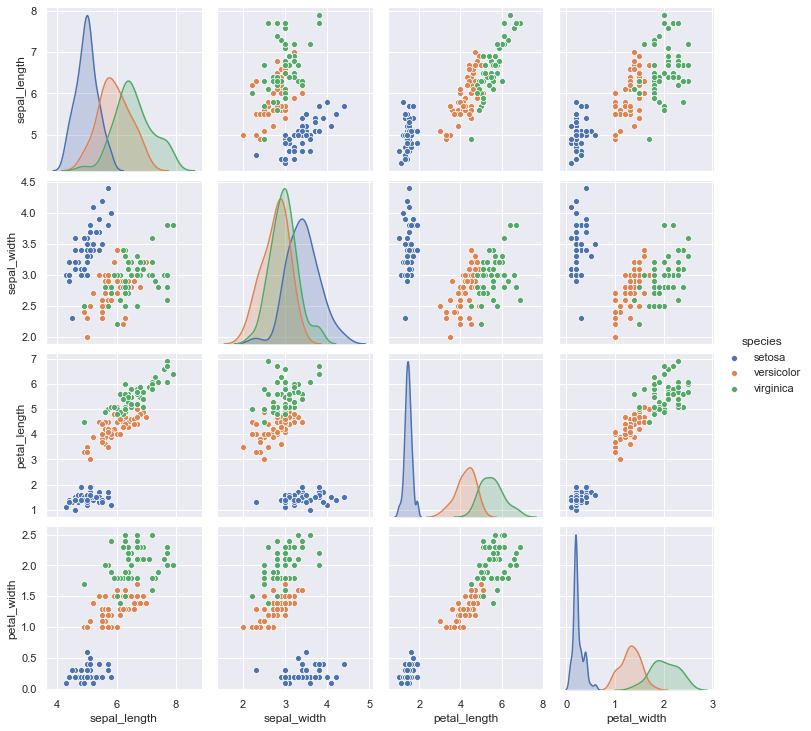

In [13]:
sns.pairplot(iris,hue='species')

### Correlation Matrix

In [14]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


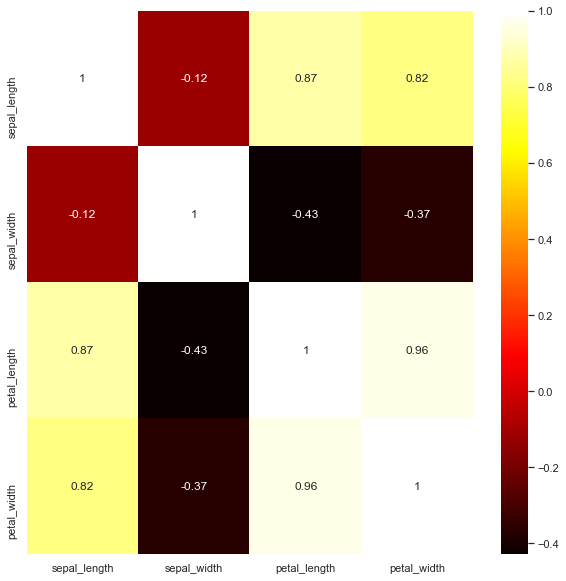

In [15]:
corrmat = iris.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heatmap
sns.heatmap(iris[top_corr_features].corr(), annot=True, cmap="hot")

### Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Training Model

In [17]:
from sklearn.model_selection import train_test_split
X = iris.drop(columns=['species'])
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [18]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### Model Selection

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [20]:
pred = rf.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test, pred),5)*100,"%")

Accuracy: 95.556 %


In [21]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
svm = SVC()
nb = GaussianNB()


### Evaluating Model

In [22]:
models = [lr,dt,knn,rf,svm,nb]
scores=[]

for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
    print("Accuracy of "+type(model).__name__+" is",(accuracy_score(y_test, pred)))

Accuracy of LogisticRegression is 0.9777777777777777
Accuracy of DecisionTreeClassifier is 0.9555555555555556
Accuracy of KNeighborsClassifier is 0.9777777777777777
Accuracy of RandomForestClassifier is 0.9555555555555556
Accuracy of SVC is 0.9777777777777777
Accuracy of GaussianNB is 0.9333333333333333


### Confusion Matrix

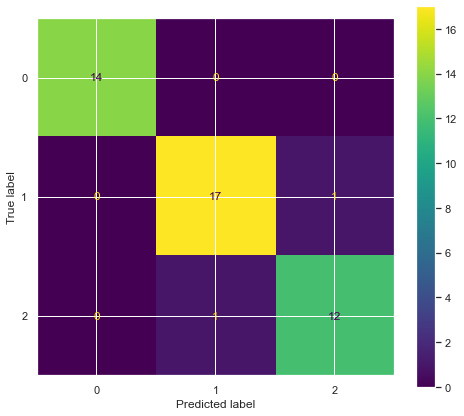

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

In [24]:
final_result = pd.DataFrame({'Models':['Logistic Regression','Decision Tree Classifier','K-Nearest Neighbours','Random Forest','Support Vector Machine','Naive Bayes'],'Accuracy':scores})
final_result

,Models,Accuracy
0,Logistic Regression,0.977778
1,Decision Tree Classifier,0.955556
2,K-Nearest Neighbours,0.977778
3,Random Forest,0.955556
4,Support Vector Machine,0.977778
5,Naive Bayes,0.933333


# Conclusion

 Logistic Regression, K-Nearest Neighbours,Support Vector Machine(SVM) models have highest accuracy as compared to Decision Tree Classifier, Random Forest, Naive Bayes	Models